# Presentation Visuals Notebook #

The purpose of this notebook is simply to have a space to prepare visuals for a presentation outside of the flow of the main notebook.  All code here is adapted from the other notebooks to reproduce the key visuals in a more presentation-friendly way.

In [1]:
# Common data science imports used in this notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from sklearn.metrics import classification_report

# Basic Python libraries used in this notebook
import json

In [2]:
# Load the training history for each model.
test1_history_dict = json.load(open(f'../saved_models/test1_hist', 'r'))
model2_history_dict = json.load(open(f'../saved_models/model2_hist', 'r'))

In [3]:
# Load the predictions for each model.
test1_train_pred_df = pd.read_csv(f'../saved_models/test1_float_train.csv')
test1_val_pred_df = pd.read_csv(f'../saved_models/test1_float_val.csv')
model2_train_pred_df = pd.read_csv(f'../saved_models/model2_train.csv')
model2_val_pred_df = pd.read_csv(f'../saved_models/model2_val.csv')

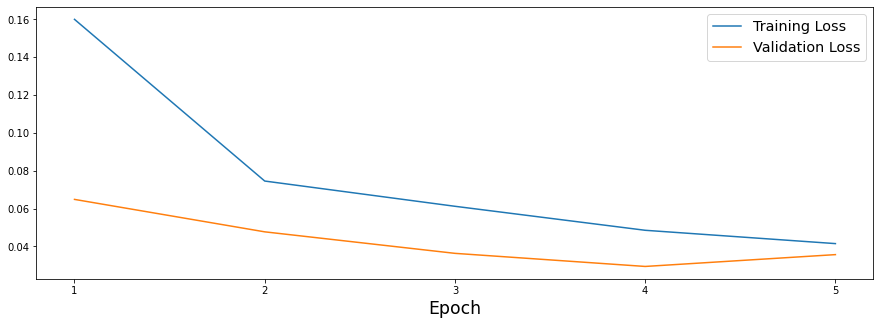

In [4]:
plt.figure(figsize=(15,5))
plt.plot(range(1,6), test1_history_dict['loss'], label='Training Loss')
plt.plot(range(1,6), test1_history_dict['val_loss'], label='Validation Loss')
plt.xlabel('Epoch', fontsize='xx-large')
plt.xticks(range(1,6))
plt.legend(fontsize='x-large');

In [6]:
# plt.figure(figsize=(15,5))
# plt.plot(new_history_dict['accuracy'], label='Training Accuracy')
# plt.plot(new_history_dict['val_accuracy'], label='Validation Accuracy')
# plt.legend();

In [7]:
# This function assigns a given number to either 0 or 1 according to a given cutoff.
def binarize_class(in_num, cutoff):
    if in_num < cutoff:
        return 0
    else:
        return 1

In [8]:
# Calculate precision, recall, f1 score, and accuracy of snow identification for 39 different cutoffs.
snow_cutoffs = []
snow_precisions = []
snow_recalls = []
snow_f1_scores = []
accuracies = []
for snow_cutoff in np.linspace(.025, .975, 39):
    test1_val_pred_df['pred_binary'] = test1_val_pred_df['pred'].apply(binarize_class, args=(snow_cutoff,))
    report = classification_report(test1_val_pred_df['true'], test1_val_pred_df['pred_binary'], target_names=['clear', 'snow'], output_dict=True)
    snow_cutoffs.append(snow_cutoff)
    snow_precisions.append(report['snow']['precision'])
    snow_recalls.append(report['snow']['recall'])
    snow_f1_scores.append(report['snow']['f1-score'])
    accuracies.append(report['accuracy'])

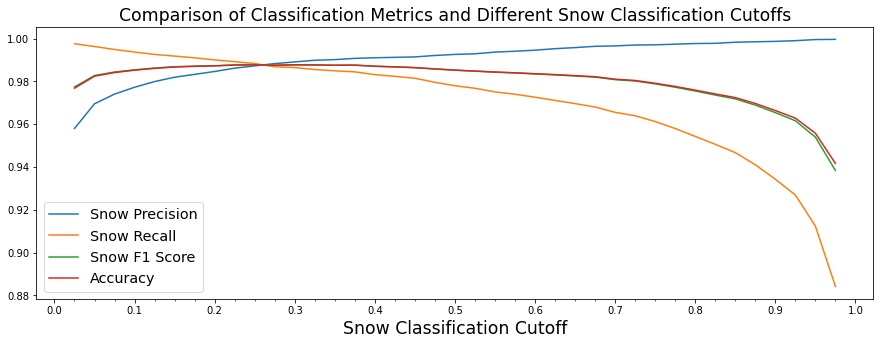

In [9]:
# Plot the precision, recall, f1 score, and accuracty of snow identification for each cutoff.
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(snow_cutoffs, snow_precisions, label='Snow Precision')
ax.plot(snow_cutoffs, snow_recalls, label='Snow Recall')
ax.plot(snow_cutoffs, snow_f1_scores, label='Snow F1 Score')
ax.plot(snow_cutoffs, accuracies, label='Accuracy')
ax.xaxis.set_major_locator(MultipleLocator(.1))
ax.xaxis.set_minor_locator(MultipleLocator(.025))
ax.set_title('Comparison of Classification Metrics and Different Snow Classification Cutoffs', fontsize='xx-large')
ax.set_xlabel('Snow Classification Cutoff', fontsize='xx-large')
ax.legend(fontsize='x-large');